In [4]:
library(tidyverse)

# Load data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

# Summary statistics
summary(players)
summary(sessions)

# Basic descriptive tables
players %>% summarise(
  n_players = n(),
  mean_age = mean(Age, na.rm = TRUE),
  mean_played_hours = mean(played_hours, na.rm = TRUE)
)

sessions %>% summarise(
  n_sessions = n()
)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

n_players,mean_age,mean_played_hours
<int>,<dbl>,<dbl>
196,21.13918,5.845918


n_sessions
<int>
1535


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


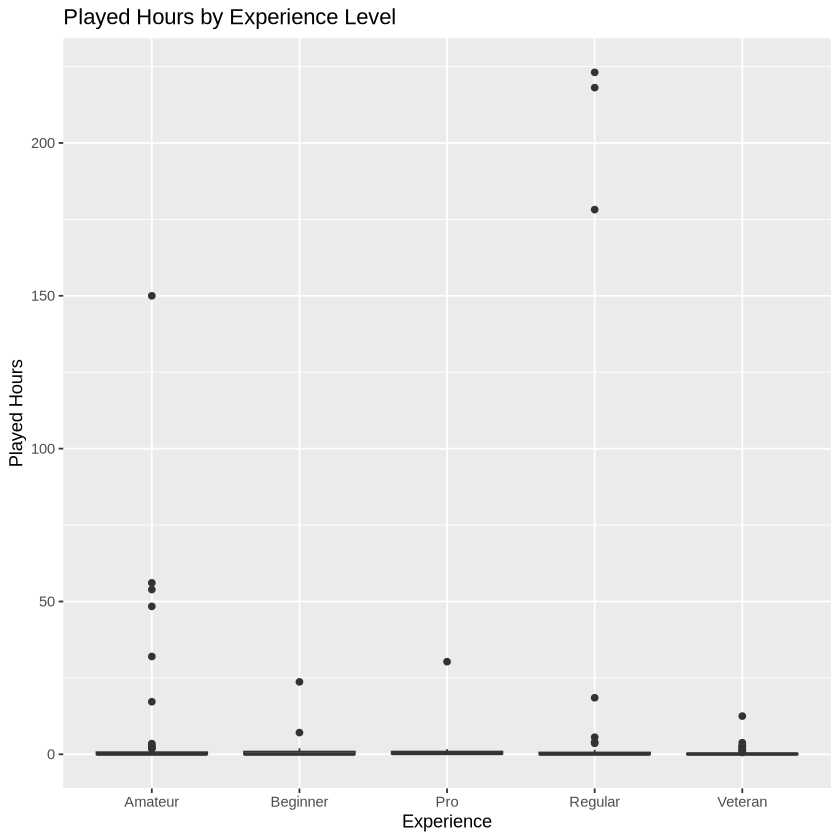

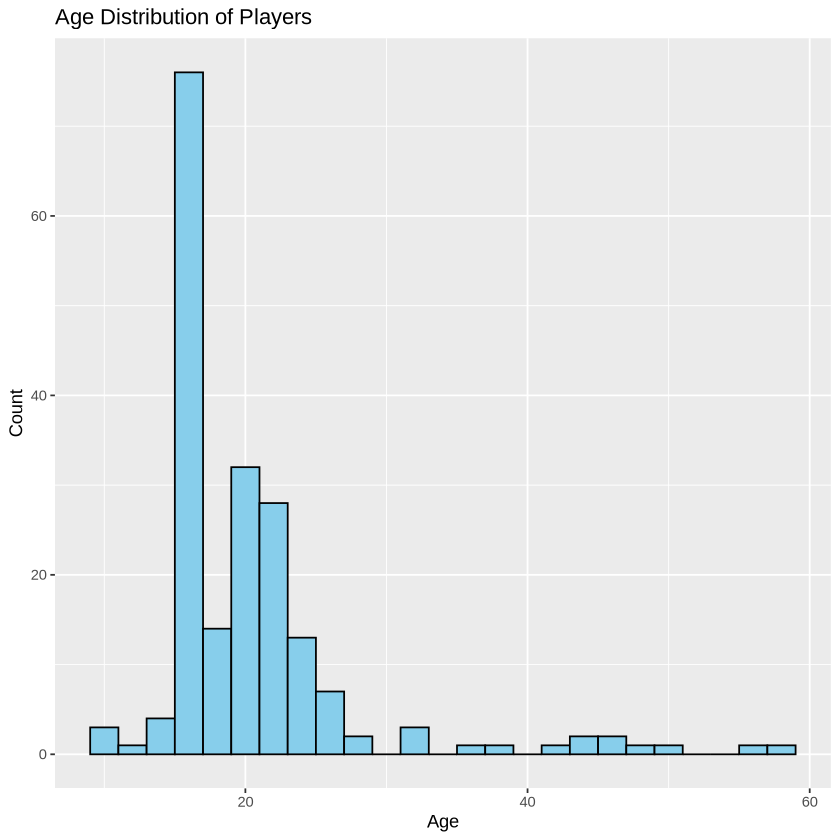

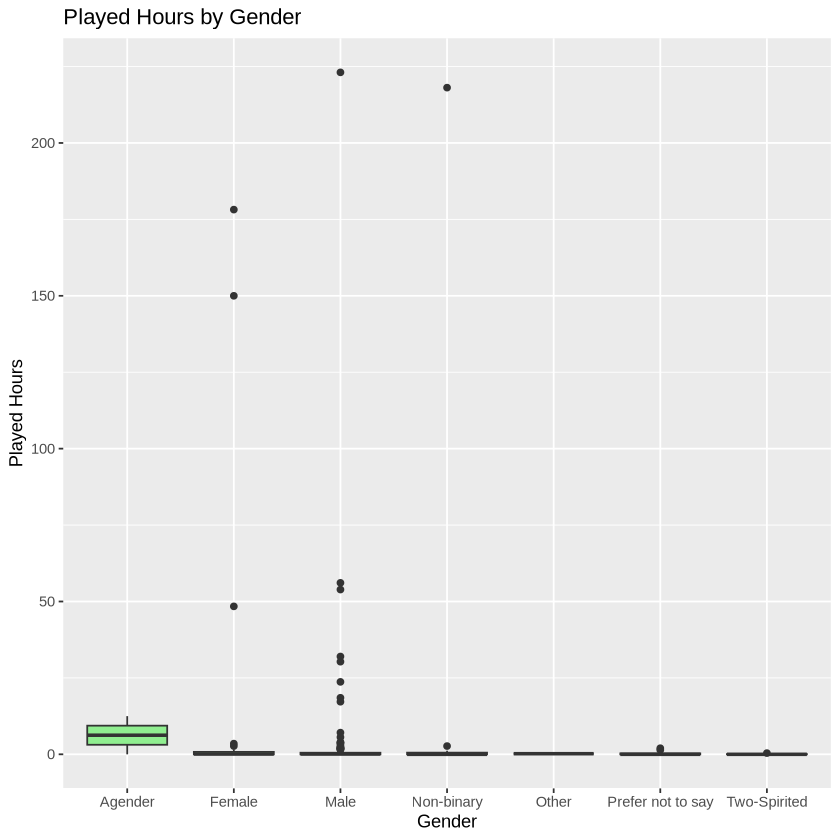

In [5]:
# Example plots
ggplot(players, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(title = "Played Hours by Experience Level", x = "Experience", y = "Played Hours")

ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "skyblue", color = "black") +
  labs(title = "Age Distribution of Players", x = "Age", y = "Count")

ggplot(players, aes(x = gender, y = played_hours)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Played Hours by Gender", x = "Gender", y = "Played Hours")

### Data Description
- **players.csv**: Contains demographic and gameplay info
  - Observations: `r nrow(players)`
  - Variables: `r ncol(players)`
  - Key variables: Age, Gender, Experience, Played_hours, Subscribe
- **sessions.csv**: Contains timestamped gameplay sessions
  - Observations: `r nrow(sessions)`
  - Variables: `r ncol(sessions)`
  - Key variables: start_time, end_time

### Exploratory Data Analysis
- Players with more experience tend to have higher total played hours.
- Age distribution shows most players are between 15-25 years old.
- Gender differences in played hours appear minor but need further exploration.

### Methods and Plan

**Broad Question:** Which player characteristics predict subscribing to the game newsletter?

**Specific Question:** Can Age, Gender, Experience, and Played_hours predict if a player subscribes to the newsletter?

**Proposed Method:** Logistic Regression
- Appropriate for binary response variable (Subscribe: Yes/No)
- Assumptions: independent observations, linearity of log-odds for numeric predictors
- Potential limitations: missing data, biased self-reported variables
- Model selection: compare using accuracy and ROC-AUC
- Data processing: split data into 70% training and 30% test, use cross-validation on training set